# Credit Risk Prediction

Created by: [Zalfy Putra Rezky](https://www.linkedin.com/in/zalfyputra/)

This report aims to develop machine learning models to predict credit risk based on a dataset that includes approved and rejected loan applications.

Click [here](https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv) to access the dataset and [here](https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit?gid=625366020#gid=625366020) for the data dictionary.

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')
df.info()

C:\Users\ACER\AppData\Local\Temp\ipykernel_24516\1171339239.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan_data_2007_2014.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

The dataset contains 75 columns, consisting of 22 categorical columns, 53 numerical columns, and 18 inactive columns (all NULL values).

In [3]:
df.shape

(466285, 75)

In [4]:
df.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [7]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

Split the dataset into numerical and categorical columns

In [8]:
# Select numerical columns
numerical_df = df.select_dtypes(exclude=['object'])

# Select categorical columns
categorical_df = df.select_dtypes(include=['object'])

# Display the numerical and categorical DataFrames
print("Numerical Columns:", numerical_df.shape[1])
print("Categorical Columns:", categorical_df.shape[1])

Numerical Columns: 53
Categorical Columns: 22


### Analyze the categorical columns

In [9]:
# Display the number of unique values in each column
categorical_df.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
desc                   124435
purpose                    14
title                   63098
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
next_pymnt_d              100
last_credit_pull_d        103
application_type            1
dtype: int64

Several columns have a high number of unique values, such as `emp_title`, `url`, `desc`, and `title`. We'll only be using columns with 14 or less unique values.

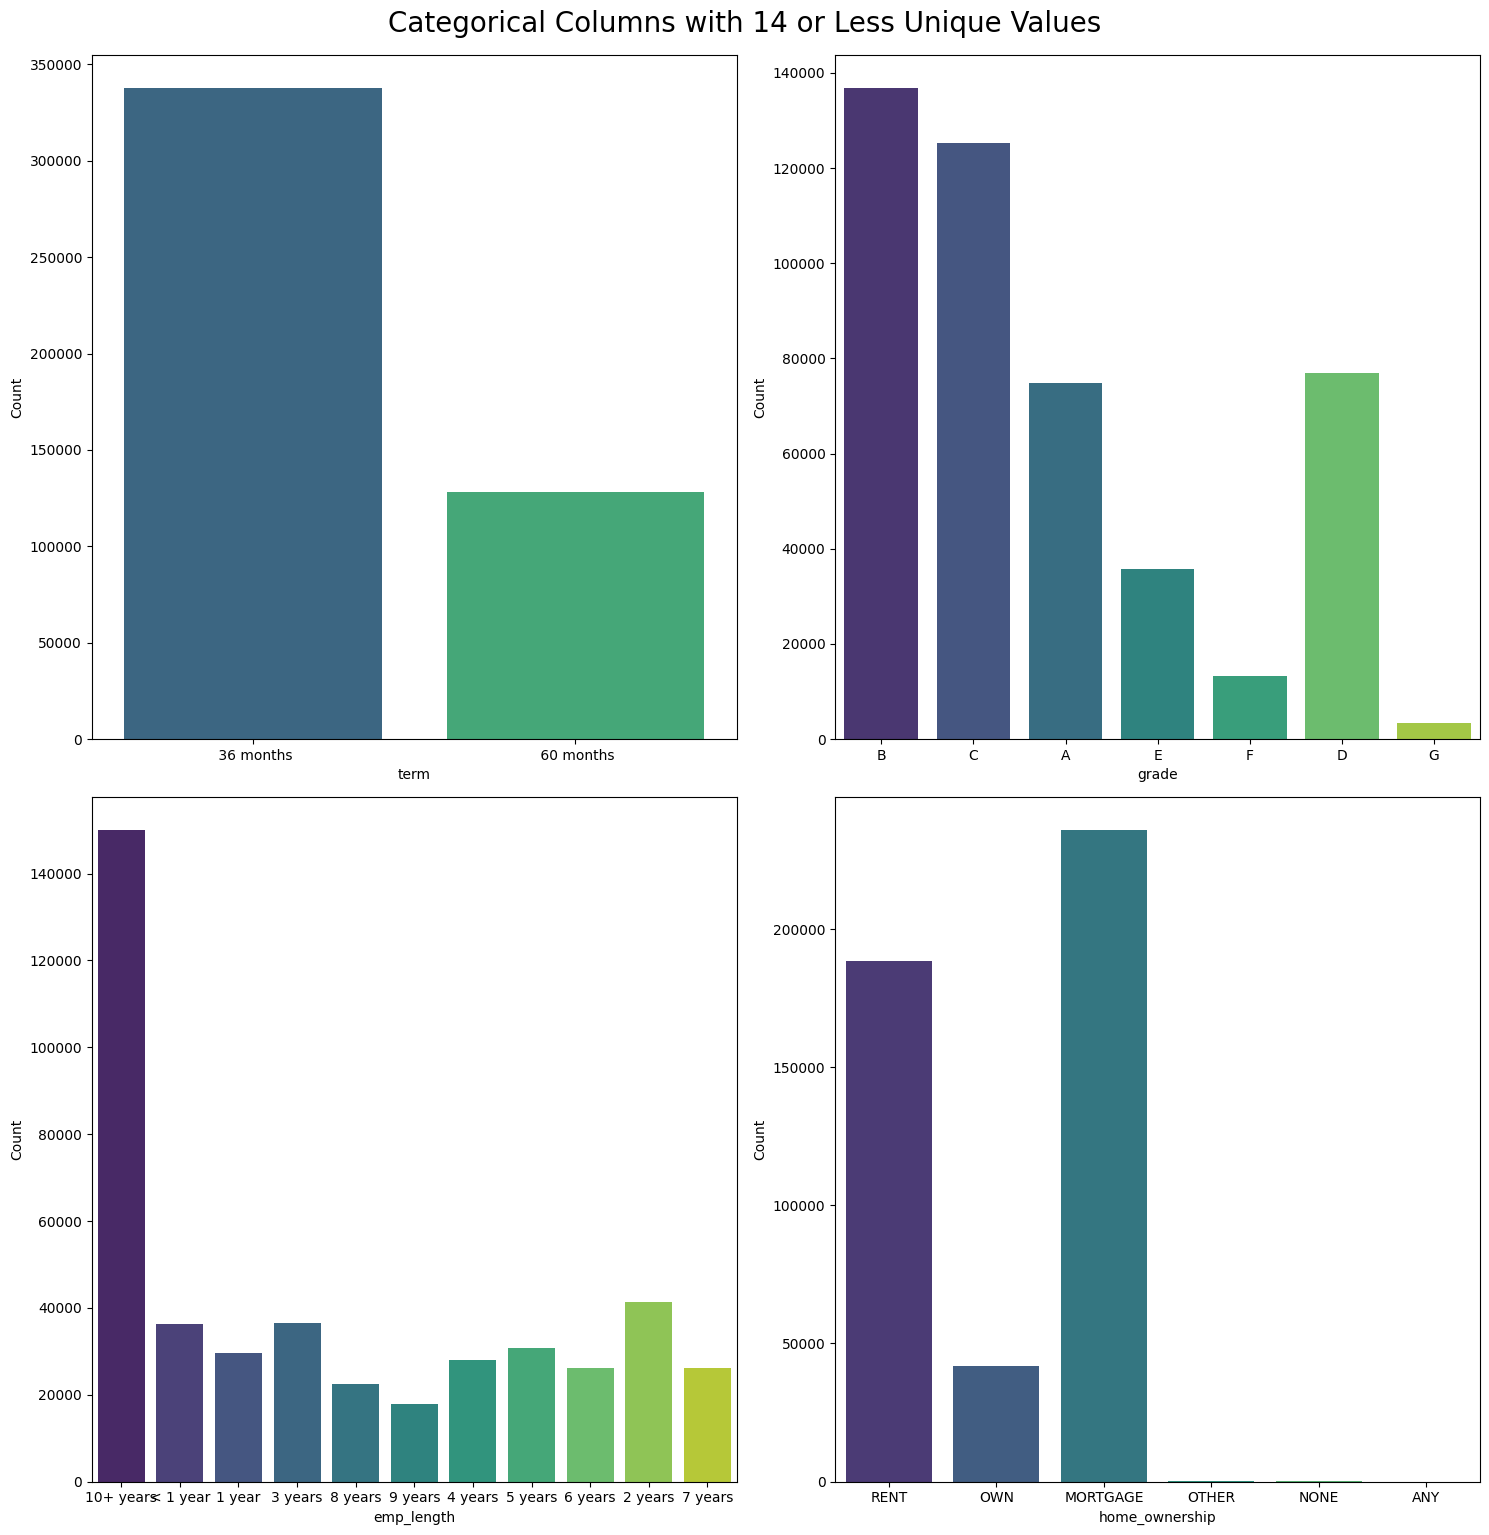

In [10]:
# Display columns under 14 unique values
temp = []
for col in categorical_df.columns:
    if categorical_df[col].nunique() <= 14:
        temp.append(col)

# Create a figure with subplots
fig = plt.figure(figsize=(15, 15))

# Loop through the columns
for i in range(4):
    fig.add_subplot(2, 2, i+1)
    sns.countplot(data=categorical_df, x=temp[i], palette='viridis')
    plt.xlabel(temp[i])
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Display the title for the entire figure
plt.suptitle('Categorical Columns with 14 or Less Unique Values', y=1.02, fontsize=20)

# Show the plots
plt.show()

In [11]:
# Display and count the unique values of home_ownership column
categorical_df['home_ownership'].value_counts()

home_ownership
MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: count, dtype: int64

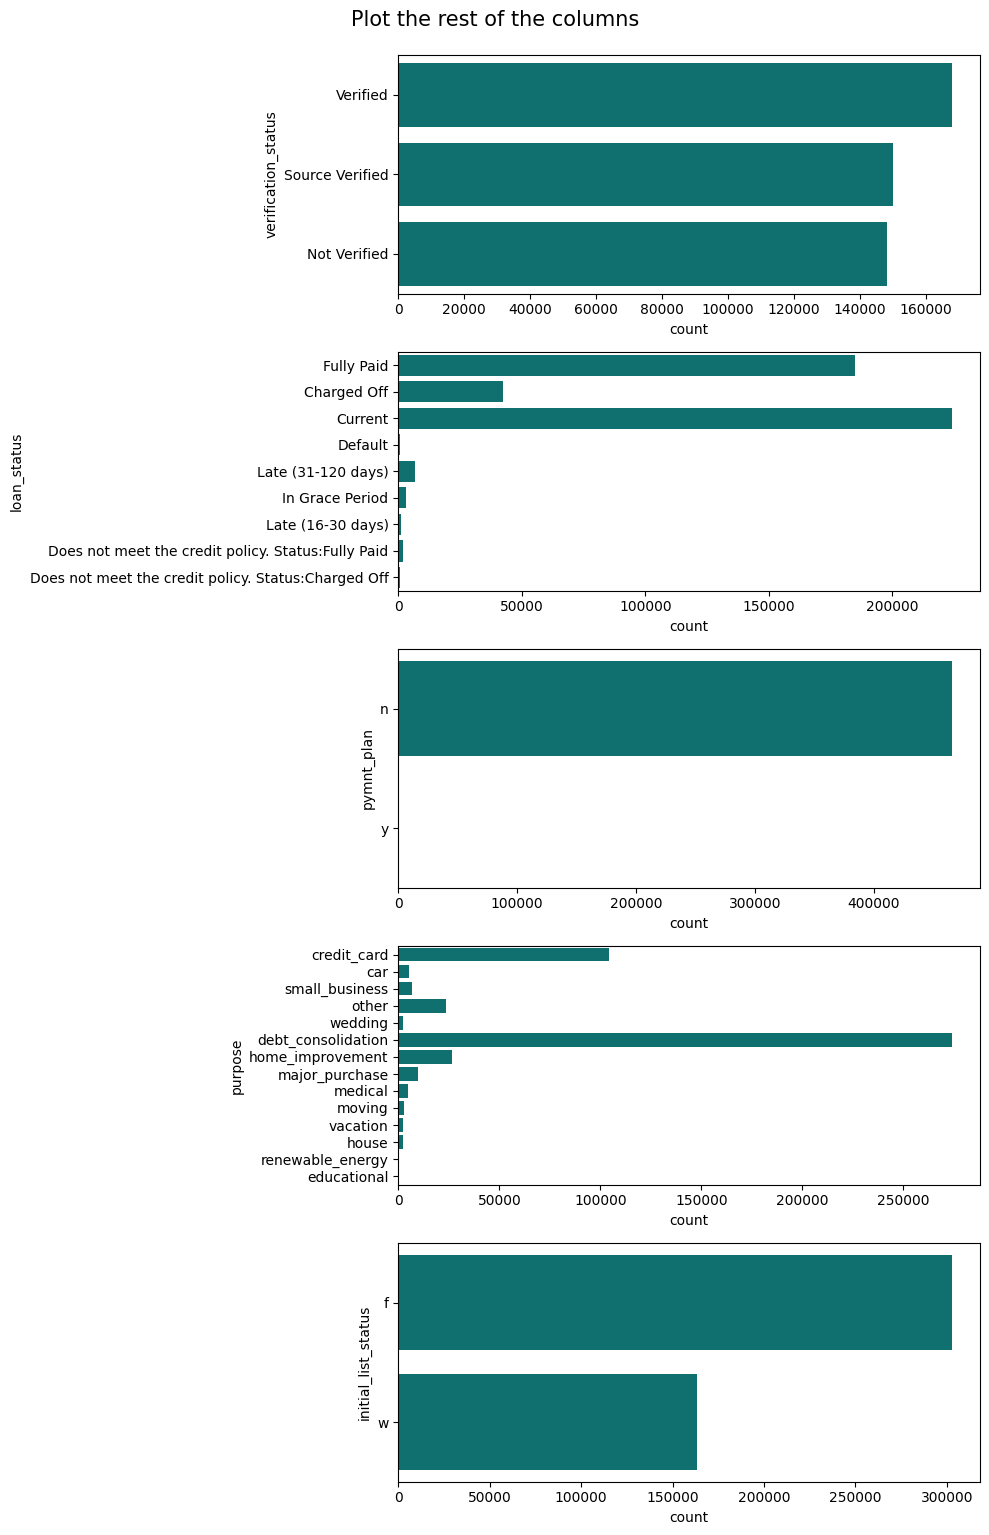

In [12]:
# Create a figure with subplots
fig = plt.figure(figsize=(10, 15))

# Loop through the columns
for i in range(5):
    fig.add_subplot(5, 1, i+1)
    sns.countplot(data=categorical_df, y=temp[i+4], color='teal')

# Adjust layout
plt.tight_layout()

# Display the title for the entire figure
plt.suptitle('Plot the rest of the columns', y=1.02, fontsize=15)

# Show the plots
plt.show()

### Analyze the numerical columns

In [13]:
# Display the number of unique values in numerical columns
numerical_df.nunique()

Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
mths_since_last_record            123
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries  

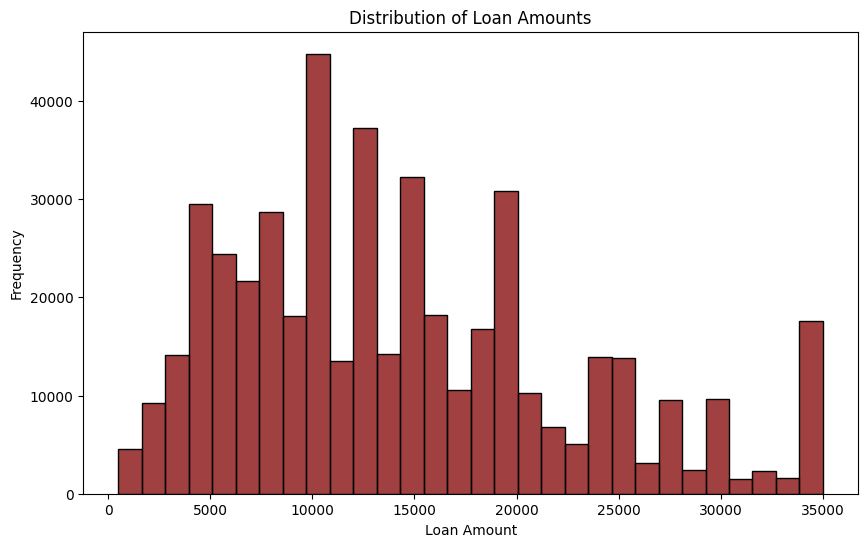

In [14]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution of loan amounts using a histogram
sns.histplot(numerical_df['loan_amnt'], bins=30, color='maroon')

# Add titles and labels
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Show the plot
plt.show()

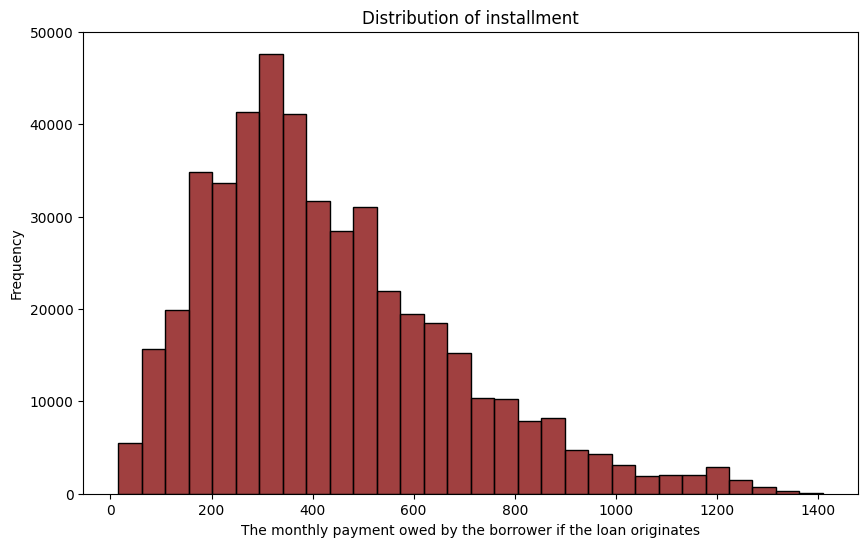

In [15]:
# Create a figure
plt.figure(figsize=(10, 6))

# Plot the distribution of loan amounts using a histogram
sns.histplot(numerical_df['installment'], bins=30, color='maroon')

# Add titles and labels
plt.title('Distribution of installment')
plt.xlabel('The monthly payment owed by the borrower if the loan originates')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [16]:
# Drop the columns with missing value
numerical_df = numerical_df.dropna(axis=1)

# Drop unnecessary columns
columns_to_drop = [
    'Unnamed: 0', 
    'id', 
    'member_id', 
    'policy_code', 
    'funded_amnt', 
    'funded_amnt_inv', 
]

# Drop the columns
numerical_df = numerical_df.drop(columns=columns_to_drop)

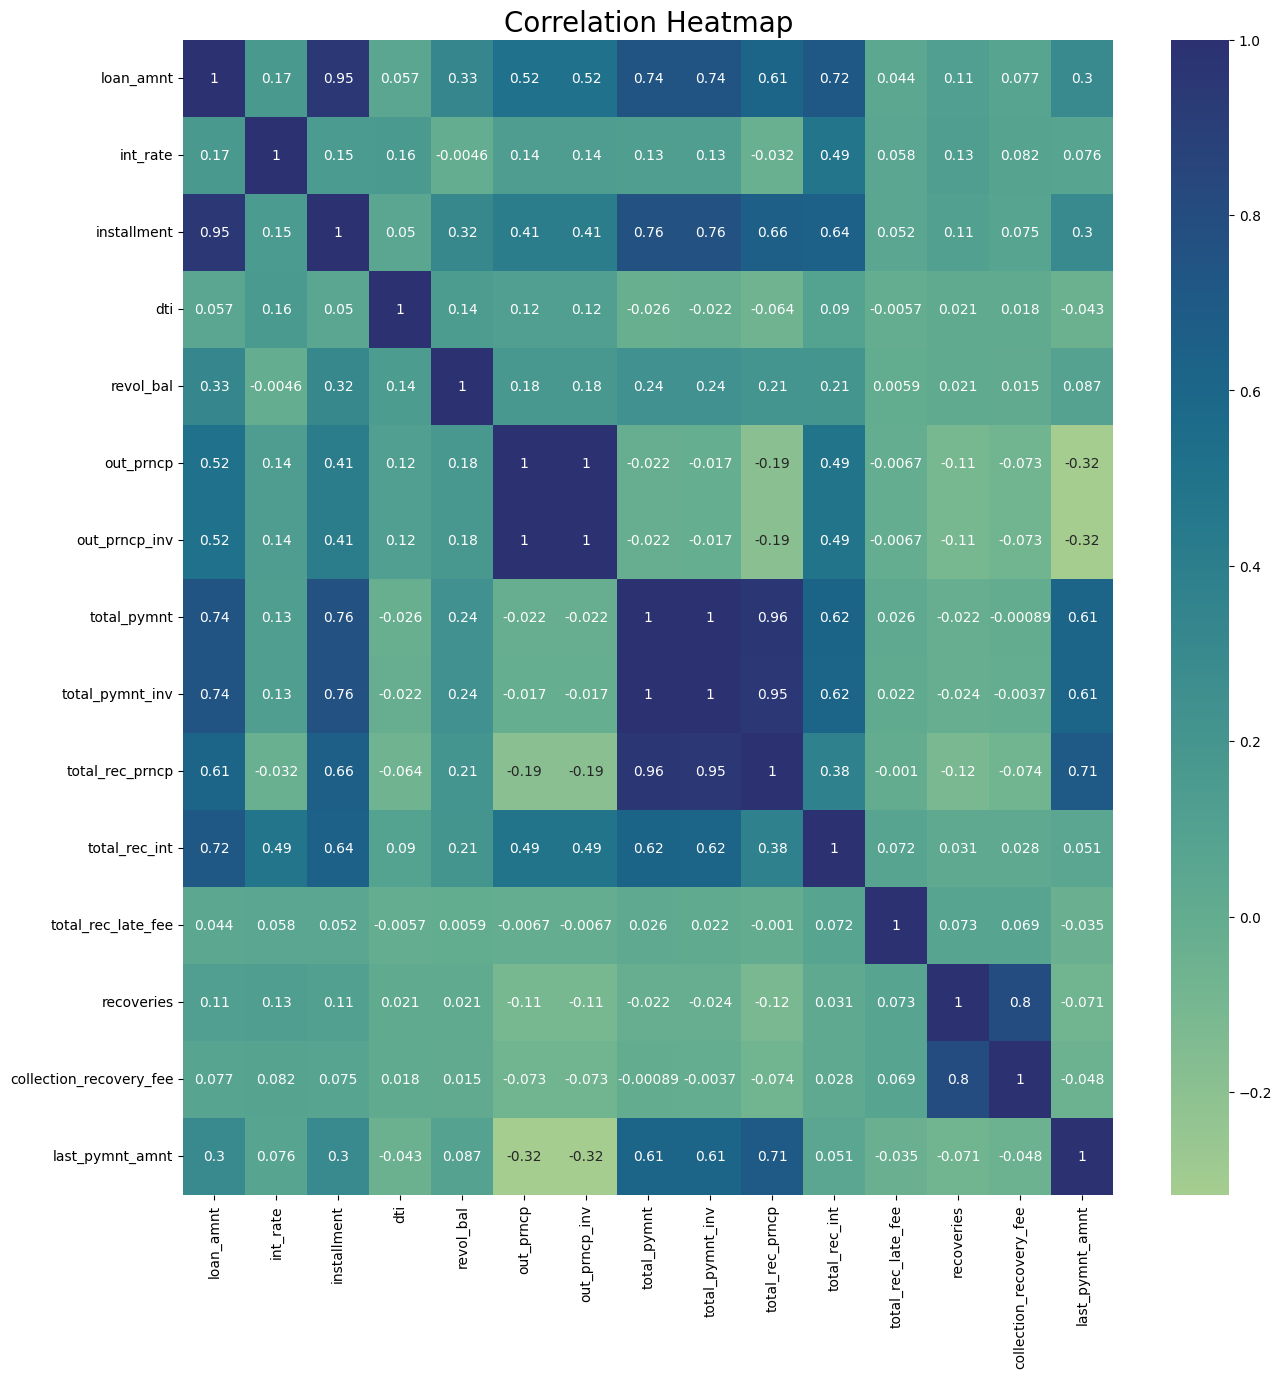

In [17]:
# Show correlation between numerical columns
plt.figure(figsize=(15, 15))
sns.heatmap(numerical_df.corr(), annot=True, cmap="crest")
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

## Data Preparation

### Data Cleaning

In [18]:
# Drop missing values from the categorical columns
categorical_df = categorical_df.dropna(axis=1)

# Drop missing values from the numerical columns
numerical_df = numerical_df.dropna(axis=1)

# Combine the numerical and categorical columns
df = pd.concat([numerical_df, categorical_df], axis=1)
df.isnull().sum()

loan_amnt                  0
int_rate                   0
installment                0
dti                        0
revol_bal                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
term                       0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
initial_list_status        0
application_type           0
dtype: int64

In [19]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


### Feature Engineering

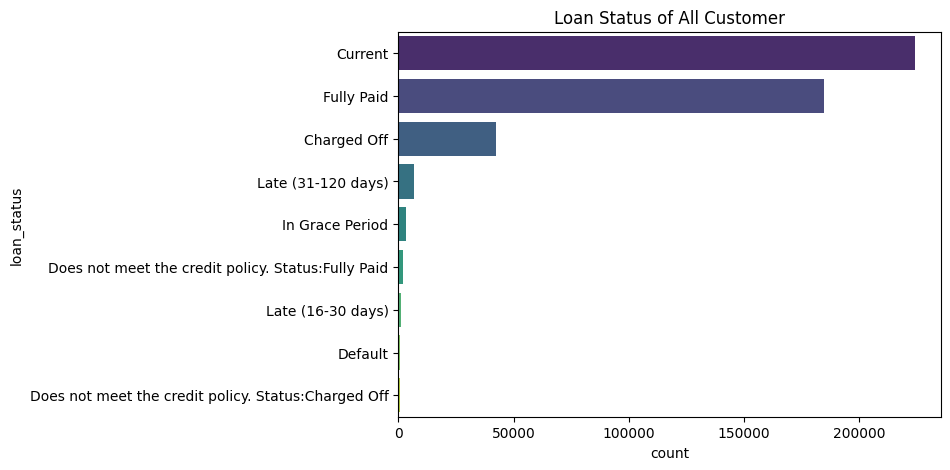

loan_status
Current                                                48.09%
Fully Paid                                             39.62%
Charged Off                                             9.11%
Late (31-120 days)                                      1.48%
In Grace Period                                         0.67%
Does not meet the credit policy. Status:Fully Paid      0.43%
Late (16-30 days)                                       0.26%
Default                                                 0.18%
Does not meet the credit policy. Status:Charged Off     0.16%
Name: count, dtype: object


In [20]:
# Display and count the unique values of the loan status column
value_counts = categorical_df['loan_status'].value_counts().sort_values(ascending=False)
percentage = value_counts / value_counts.sum()
percentage = percentage.apply(lambda x: "{:.2%}".format(x))
sorted_df = categorical_df.loc[categorical_df['loan_status'].isin(value_counts.index)]

# Plot the loan status
plt.figure(figsize=(7, 5))
plt.title('Loan Status of All Customer')
sns.countplot(y="loan_status", data=sorted_df, order=value_counts.index, palette='viridis')
plt.show()

print(percentage)

Unique values such as `Current`, `Fully Paid`, `In Grace Period`, and `Does not meet the credit policy. Status:Fully Paid` are considered as _GOOD loans_ (with a label of 1), while the rest are _BAD loans_ (with a label of 0).

In [21]:
# Create a list of good loans
good_list = [
    'Current', 
    'Fully Paid', 
    'In Grace Period',
    'Does not meet the credit policy. Status:Fully Paid'
]

# Update the loan status column
df['loan_status'] = np.where(df['loan_status'].isin(good_list), 1, 0)
df['loan_status'].value_counts()

loan_status
1    414099
0     52186
Name: count, dtype: int64

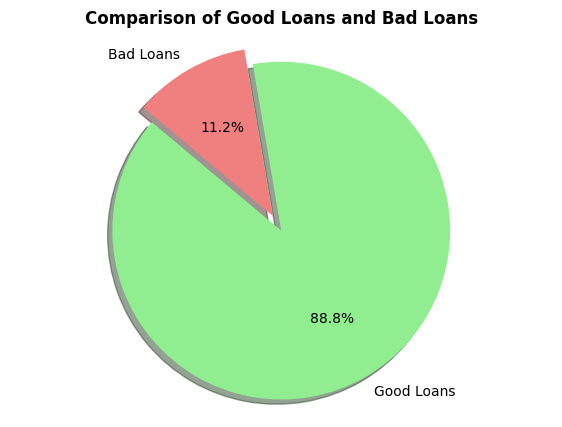

In [22]:
# Plot the Good Loans and Bad Loans comparison
churn_rate = df['loan_status'].value_counts()
text_props = {'color': 'gray', 'weight': 'bold'}

plt.figure(figsize=(7, 5))
plt.pie(churn_rate, labels=['Good Loans', 'Bad Loans'], autopct='%1.1f%%', colors = ['lightgreen', 'lightcoral'], explode = (0, 0.1), shadow=True, startangle=140)
plt.axis('equal')
plt.title('Comparison of Good Loans and Bad Loans', fontweight='bold')
plt.show()

In [23]:
# Show percentage of pymnt_plan column
df['pymnt_plan'].value_counts(normalize=True) * 100

pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64

The `pymnt_plan` column will be dropped because 99% of the value are `n`, making the column imbalanced.

In [24]:
# Drop unnecessary columns
columns_to_drop = [
    'issue_d',
    'pymnt_plan',
    'url',
    'zip_code',
    'addr_state',
    'application_type',
]

# Drop the columns
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   int_rate                 466285 non-null  float64
 2   installment              466285 non-null  float64
 3   dti                      466285 non-null  float64
 4   revol_bal                466285 non-null  int64  
 5   out_prncp                466285 non-null  float64
 6   out_prncp_inv            466285 non-null  float64
 7   total_pymnt              466285 non-null  float64
 8   total_pymnt_inv          466285 non-null  float64
 9   total_rec_prncp          466285 non-null  float64
 10  total_rec_int            466285 non-null  float64
 11  total_rec_late_fee       466285 non-null  float64
 12  recoveries               466285 non-null  float64
 13  collection_recovery_fee  466285 non-null  float64
 14  last

### One Hot Encoding
Convert the remaining categorical columns into numerical columns.

In [25]:
# Get object columns and create dummy variables
onehot = pd.get_dummies(df.select_dtypes(include='object'))
onehot = onehot.astype(int)
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 69 columns):
 #   Column                               Non-Null Count   Dtype
---  ------                               --------------   -----
 0   term_ 36 months                      466285 non-null  int32
 1   term_ 60 months                      466285 non-null  int32
 2   grade_A                              466285 non-null  int32
 3   grade_B                              466285 non-null  int32
 4   grade_C                              466285 non-null  int32
 5   grade_D                              466285 non-null  int32
 6   grade_E                              466285 non-null  int32
 7   grade_F                              466285 non-null  int32
 8   grade_G                              466285 non-null  int32
 9   sub_grade_A1                         466285 non-null  int32
 10  sub_grade_A2                         466285 non-null  int32
 11  sub_grade_A3                         46

### Feature Scaling

In [26]:
sc = StandardScaler()
scaled = pd.DataFrame(sc.fit_transform(numerical_df), columns=numerical_df.columns)
scaled.head()

,loan_amnt,int_rate,installment,dti,revol_bal,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,-1.124392,-0.729587,-1.105575,1.328632,-0.124888,-0.693944,-0.693896,-0.687137,-0.683064,-0.549800,-0.695548,-0.123464,-0.154549,-0.104824,-0.531492
1,-1.426088,0.330634,-1.528763,-2.065791,-0.703378,-0.693944,-0.693896,-1.274191,-1.267385,-1.195952,-0.867019,-0.123464,0.057470,-0.091840,-0.540846
2,-1.438156,0.488979,-1.428140,-1.082491,-0.642003,-0.693944,-0.693896,-1.032837,-1.025695,-0.919555,-0.799187,-0.123464,-0.154549,-0.104824,-0.445387
3,-0.521001,-0.077850,-0.380931,0.354248,-0.514224,-0.693944,-0.693896,0.082948,0.091640,0.161268,-0.152728,3.099264,-0.154549,-0.104824,-0.498032
4,-1.365749,-0.261438,-1.496071,0.091865,0.558748,-0.573268,-0.573185,-1.003980,-0.996798,-0.943290,-0.635962,-0.123464,-0.154549,-0.104824,-0.550184


### Finalize Dataframe

In [27]:
df = pd.concat([onehot, scaled, df[['loan_status']]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 85 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   term_ 36 months                      466285 non-null  int32  
 1   term_ 60 months                      466285 non-null  int32  
 2   grade_A                              466285 non-null  int32  
 3   grade_B                              466285 non-null  int32  
 4   grade_C                              466285 non-null  int32  
 5   grade_D                              466285 non-null  int32  
 6   grade_E                              466285 non-null  int32  
 7   grade_F                              466285 non-null  int32  
 8   grade_G                              466285 non-null  int32  
 9   sub_grade_A1                         466285 non-null  int32  
 10  sub_grade_A2                         466285 non-null  int32  
 11  sub_grade_A3 

## Data Modelling

### Data Splitting

In [28]:
# Define the features and target
X = df.drop(columns='loan_status', axis=1)
y = df['loan_status']
y.value_counts()

loan_status
1    414099
0     52186
Name: count, dtype: int64

In [29]:
# Split the data with a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (373028, 84) (373028,)
Test set: (93257, 84) (93257,)


### Data Training

### 1 — Logistic Regression

In [30]:
# Define the Logistic Regression model
model = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'penalty': ['l2', 'elasticnet'],
    'C': [1, 10],
    'solver': ['saga'],
    'l1_ratio': [0.2, 0.5]
}

# Initialize GridSearchCV with ROC AUC scoring
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score (CV):", best_score)

# Evaluate the model on the training and testing sets
best_model = grid_search.best_estimator_

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, best_model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training ROC AUC:", train_roc_auc)
print("Testing ROC AUC:", test_roc_auc)

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'C': 10, 'l1_ratio': 0.2, 'penalty': 'l2', 'solver': 'saga'}
Best ROC AUC Score (CV): 0.96542610922119
Training Accuracy: 0.9749026882700494
Testing Accuracy: 0.9741788820142188
Training ROC AUC: 0.9659976354664078
Testing ROC AUC: 0.9650360825400572


### 2 — Naive Bayes

In [31]:
# Define the Naive Bayes model
model = GaussianNB()

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training ROC AUC:", train_roc_auc)
print("Testing ROC AUC:", test_roc_auc)

Training Accuracy: 0.9121888973481883
Testing Accuracy: 0.9102694703882819
Training ROC AUC: 0.8801140229033413
Testing ROC AUC: 0.8786825316442916


## Evaluation

Based on the ROC AUC scores:

1. **Logistic Regression**: Shows strong performance with a Training ROC AUC of 93.04% and Testing ROC AUC of 92.81%, indicating good generalization to unseen data.

2. **Naive Bayes**: Also performs well with a Training ROC AUC of 91.44% and Testing ROC AUC of 91.33%, suggesting it generalizes adequately to new data.

Both models shows great performance on both training and testing datasets, with similar ROC AUC scores. This suggests that they are not overfitting or underfitting significantly but are instead capturing the underlying patterns in the data effectively.